In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ln -s /content/drive/My\ Drive/ /mydrive

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/My Drive/ManojSirIntern/data_final.csv')

In [5]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)

In [6]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

In [7]:
count = 0;
for i in Y:
  if(i==1):
    count = count+1
print(count)


3615


In [ ]:
len(Y)-count

30226

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,13.130,26.260,22.87,22.43,25.28,21.17,20.44,20.68,21.14,20.16,...,20.89,11.85,2.460,7.58,18.84,9.770,9.070,8.960,5.240,10.610,10.840,19.13,18.000,15.950,5.26,8.35,10.230,10.08,11.62,12.320,12.18,20.89,7.07,6.31,8.56,10.48,8.20,12.53,7.90,8.580,10.12,9.960,16.92,7.600,27.161,18.05,26.47,18.75,17.84,14.920
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.000
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.035,2.070,0.91,1.09,1.64,1.39,1.02,0.64,0.88,0.98,...,20.11,20.07,22.940,16.58,19.33,27.960,27.210,19.060,25.770,27.960,24.920,27.96,17.430,25.550,19.04,13.19,13.990,14.21,10.72,15.850,13.39,27.01,12.06,14.43,17.30,16.95,8.25,22.76,14.07,20.700,6.50,9.990,11.78,18.590,26.800,18.57,14.59,12.82,19.37,15.920
4,2.90,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,5.64,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,6.99,7.95,7.59,3.32,3.61,5.35,4.73,3.68,3.530,10.780,8.84,8.37,7.91,7.96,7.45,5.33,6.46,6.61,...,14.06,10.07,20.109,8.26,15.98,20.109,20.109,20.109,20.109,20.109,20.109,16.12,12.870,14.660,9.08,8.89,14.260,0.00,0.00,4.980,9.96,11.13,10.07,9.75,9.56,9.48,10.60,10.06,10.79,10.910,17.77,10.370,15.32,13.510,12.230,14.68,16.35,18.14,18.41,17.310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,39.935,79.87,91.87,112.33,95.79,85.45,75.79,69.31,75.96,...,211.53,153.31,246.034,164.94,185.29,246.034,246.034,246.034,246.034,232.290,233.730,224.33,246.034,246.034,187.94,211.95,246.034,0.00,0.00,34.165,68.33,205.65,123.47,121.85,152.39,158.13,229.34,226.53,188.67,246.034,223.88,184.340,172.69,205.440,207.640,233.38,194.74,183.91,182.19,246.034
33837,1.84,1.82,2.26,1.80,1.24,1.69,1.95,1.20,1.29,1.36,2.87,1.30,3.04,2.27,2.83,2.30,1.94,1.58,2.34,2.24,2.66,2.64,1.29,3.92,6.33,1.44,1.86,1.17,1.69,1.73,1.370,0.000,0.00,0.00,0.67,0.00,0.02,0.72,0.72,0.00,...,4.55,6.61,6.680,6.66,7.28,4.570,5.830,8.910,11.330,10.090,11.060,7.56,4.780,6.470,4.79,6.39,5.800,3.38,7.09,6.800,7.91,6.28,4.85,4.03,7.21,6.19,8.97,9.12,9.55,4.820,0.83,4.830,6.50,6.915,7.330,5.83,7.00,5.48,5.16,8.160
33838,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,8.220,2.56,3.46,3.88,3.98,4.12,3.75,

In [ ]:
abn_x = df.iloc[4]
nor_x = df.iloc[33837]

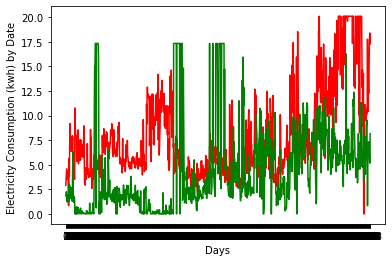

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(abn_x,'r-')
plt.plot(nor_x,'g-')
plt.xlabel('Days')
plt.ylabel('Electricity Consumption (kwh) by Date ')
plt.show()

In [10]:
x = np.array(df)
y = np.array(Y)

In [32]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27072, 1034)
(27072,)
(6769, 1034)
(6769,)


In [35]:
from sklearn import svm

In [36]:
clf = svm.SVC(C = 100, degree = 10, kernel = 'rbf', )
clf.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = clf.predict(x_test)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      6045
           1       0.62      0.09      0.16       724

    accuracy                           0.90      6769
   macro avg       0.76      0.54      0.55      6769
weighted avg       0.87      0.90      0.86      6769



In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8968828482789186

In [41]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)

In [42]:
print('No of correctly classify sample ',count, ' out of ',len(y_test))


No of correctly classify sample  6071  out of  6769


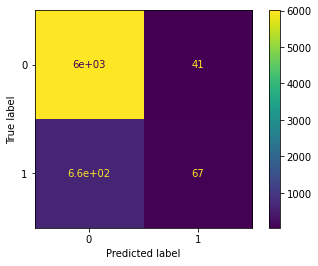

In [43]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, x_test, y_test)
plt.show()

Confusion matrix SVM@80
[[6004   41]
 [ 657   67]]
Normalized confusion matrix
[[0.99321754 0.00678246]
 [0.90745856 0.09254144]]


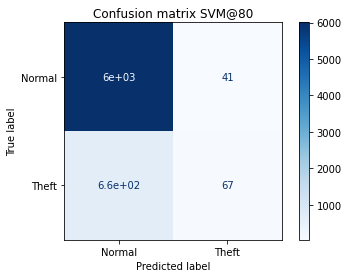

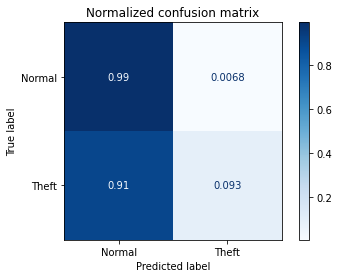

In [44]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix SVM@80", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, x_test, y_test,
                                 display_labels=['Normal','Theft'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [49]:
clf = svm.SVC(C = 100, degree = 10, kernel = 'rbf',probability=True)
clf.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
probs = clf.predict_proba(x_test)

In [51]:
y_pred = clf.predict(x_test)

In [52]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

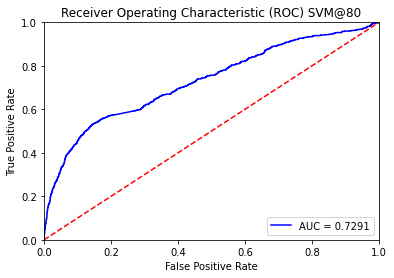

In [53]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic (ROC) SVM@80')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = # false_positive_rate
y = # true_positive_rate 

# This is the ROC curve
plt.plot(x,y)
plt.show() 

# This is the AUC
auc = np.trapz(y,x)

#Testing

In [ ]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)



(6769, 1034)
(27072, 1034)
(6769,)
(27072,)


In [ ]:
y_pred = clf.predict(x_test)
y_pred.shape

(6769,)

In [ ]:
import random

In [ ]:
y_test_m = []
x_text_m = []
for i in range(1,3001):
  h = random.randint(1,20000)
  y_test_m.append(y_train[h])
  x_text_m.append(x_train[h])
print(len(y_test_m))
print(len(x_text_m))




3000
3000


In [ ]:
for i in range(1,(6769-2999)):
  h = random.randint(1,6769)
  y_test_m.append(y_test[h])
  x_text_m.append(x_test[h])
print(len(y_test_m))
print(len(x_text_m))

6769
6769


In [ ]:
y_pred_m = clf.predict(x_text_m)
y_pred_m.shape

(6769,)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_m, y_pred_m))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      6043
           1       0.80      0.03      0.06       726

    accuracy                           0.90      6769
   macro avg       0.85      0.52      0.50      6769
weighted avg       0.89      0.90      0.85      6769



In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test_m, y_pred_m))


0.8


In [ ]:
import random
y_test_m = []
x_text_m = []
for i in range(1,3001):
  h = random.randint(1,20000)
  y_test_m.append(y_train[h])
  x_text_m.append(x_train[h])
print(len(y_test_m))
print(len(x_text_m))
for i in range(1,(6769-2999)):
  h = random.randint(1,6769)
  y_test_m.append(y_test[h])
  x_text_m.append(x_test[h])
print(len(y_test_m))
print(len(x_text_m))
y_pred_m = clf.predict(x_text_m)
y_pred_m.shape
from sklearn.metrics import classification_report
print(classification_report(y_test_m, y_pred_m))
from sklearn.metrics import precision_score
print(precision_score(y_test_m, y_pred_m))